# Plot data for each example

- Fingerprints for an optimized pose cluster
- Pair features for optimized pose cluster

In [1]:
import sys
import os
import numpy as np
sys.path.append('../../')
from score.prob_opt import PredictStructs
from containers import Protein
from shared_paths import shared_paths
from score.density_estimate import DensityEstimate
from score.prob_opt import PredictStructs
from score.statistics import statistics
from containers import Protein
from score.scores import ScoreContainer

import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rcParams['pdf.fonttype'] = 42
from matplotlib.colors import LinearSegmentedColormap
%matplotlib inline

In [2]:
def load(prot, stats, scores, fname, struct):
    root = '{}/{}/scores/{}'.format(shared_paths['data'], prot, scores)
    stats_root = '{}/{}/scores/{}'.format(shared_paths['data'], prot, stats)
    sc = ScoreContainer(root, stats_root, prot, struct)
    cluster = sc.read_results(fname)
    glide_cluster = {ligand: 0 for ligand in cluster}
    best_cluster = {}
    for name, ligand in sc.ps.ligands.items():
        best_rmsd, best_pose = float('inf'), -1
        for i, pose in enumerate(ligand.poses[:100]):
            if pose.rmsd and pose.rmsd < 2.0:
                best_cluster[name] = i
                break
    
    return cluster, glide_cluster, best_cluster, sc


prot = 'B1AR'
stats = 'stats21/stats'
scores = 'stats21/pdb/standard/1.0-mcss_contact_hbond_sb'
fname = 'pdb.sc'
struct = '2VT4'

cluster, glide_cluster, best_cluster, sc = load(prot, stats, scores, fname, struct)

In [3]:
l_list = list(cluster.keys())
l_map = {lig: alpha for lig, alpha in zip(l_list, 'abcdefghijklm')}
l_list, l_map

(['2Y00_lig',
  '2Y02_lig',
  '2Y03_lig',
  '2Y04_lig',
  '2YCW_lig',
  '2YCZ_lig',
  '3ZPQ_lig',
  '3ZPR_lig',
  '4AMI_lig',
  '4AMJ_lig',
  '5A8E_lig'],
 {'2Y00_lig': 'a',
  '2Y02_lig': 'b',
  '2Y03_lig': 'c',
  '2Y04_lig': 'd',
  '2YCW_lig': 'e',
  '2YCZ_lig': 'f',
  '3ZPQ_lig': 'g',
  '3ZPR_lig': 'h',
  '4AMI_lig': 'i',
  '4AMJ_lig': 'j',
  '5A8E_lig': 'k'})

In [4]:
interactions = sc.ps.interactions([cluster, glide_cluster],  'hbond')
unique, keys = [], set()
for code, res in interactions[::-1]:
    if res not in keys:
        unique += [(code, res)]
    keys.add(res)
#interactions = unique[::-1]

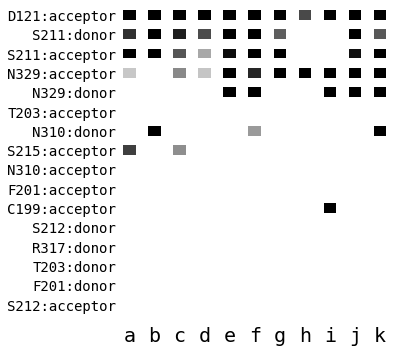

In [5]:
sc.ps.gel_plot_individual(cluster, 'hbond', l_list, interactions=interactions, resname_size = 14)
plt.xticks(range(0, 2*len(l_list), 2), [l_map[lig] for lig in l_list], rotation = 'horizontal', size = 20)
plt.tight_layout()
plt.savefig('../../pymol/figures/b1ar_panels/combind.pdf')
plt.show()

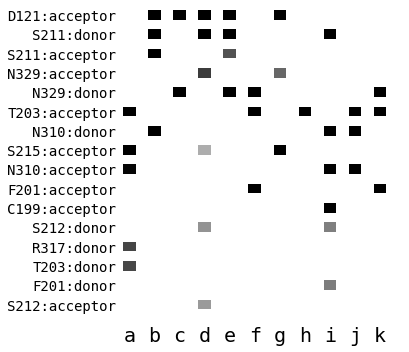

In [6]:
sc.ps.gel_plot_individual(glide_cluster, 'hbond', l_list, interactions=interactions, resname_size = 14)
plt.xticks(range(0, 2*len(l_list), 2), [l_map[lig] for lig in l_list], rotation = 'horizontal', size = 20)
plt.tight_layout()
plt.savefig('../../pymol/figures/b1ar_panels/glide.pdf', transparency = True)
plt.show()

ComBind - Glide: inf


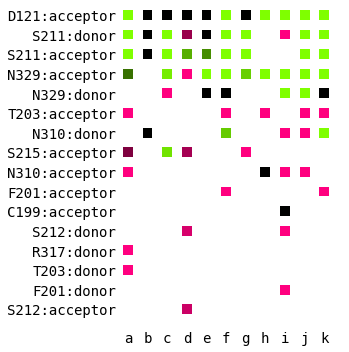

In [7]:
feature_defs = {
    'hbond':[2,3],
    'sb':[1],
    #'pipi':[6],
    #'contact':[11]
}

sc.ps.gel_plot(cluster, glide_cluster, 'hbond', l_list)
plt.xticks(range(0, 2*len(l_list), 2), [l_map[lig] for lig in l_list], rotation = 'horizontal')
plt.tight_layout()
plt.savefig('../../pymol/figures/b1ar_panels/both.pdf')
plt.show()

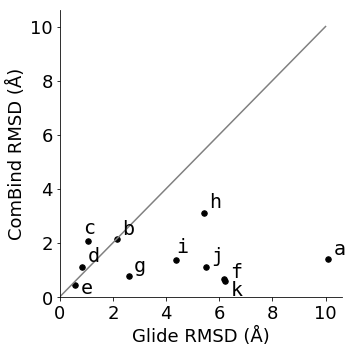

In [8]:
combind_rmsds = [sc.ps.get_rmsd({lig: cluster[lig]}) for lig in l_list]
glide_rmsds = [sc.ps.get_rmsd({lig: glide_cluster[lig]}) for lig in l_list]
f, ax = plt.subplots(figsize = (5, 5))
ax.scatter(glide_rmsds, combind_rmsds, s = 30, c = 'k')
ax.plot(range(11), c = 'grey')


for x, y, lig in zip(glide_rmsds, combind_rmsds, l_list):
    x_shift, y_shift = 0.2, 0.2
    if lig == '2YCW_lig':
        x_shift, y_shift = 0.2, -0.3
    if lig == '2Y03_lig':
        x_shift, y_shift = -0.2, 0.3
    if lig == '4AMI_lig':
        x_shift, y_shift = 0, 0.3
    if lig == '5A8E_lig':
        x_shift, y_shift = 0.2, -0.5
    if lig == '2YCZ_lig':
        x_shift, y_shift = 0.2, 0.05
        
    ax.text(x+x_shift, y+y_shift, l_map[lig], size = 20, name = 'monospace')


ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.set_xlim(0)
ax.set_ylim(ax.get_xlim())
ax.set_yticklabels(range(0, 11, 2), size=18)
ax.set_xticklabels(range(0, 11, 2), size=18)

ax.set_ylabel('ComBind RMSD (Å)', size = 18)
ax.set_xlabel('Glide RMSD (Å)', size = 18)
plt.tight_layout()
plt.savefig('../../pymol/figures/b1ar_panels/performance.pdf')
plt.show()

# TRPV1

In [9]:
prot = 'TRPV1'
stats = 'stats21/stats'
scores = 'stats21/best_affinity_diverse/standard/20-1.0-mcss_contact_hbond_sb'
fname = '5IRX_lig-to-3J5Q.sc'
struct = '3J5Q'

cluster, glide_cluster, best_cluster, sc = load(prot, stats, scores, fname, struct)

In [10]:
l_list = list(cluster.keys())
interactions = sc.ps.interactions([cluster, glide_cluster],  'hbond')
unique, keys = [], set()
for code, res in interactions[::-1]:
    if res not in keys:
        unique += [(code, res)]
    keys.add(res)

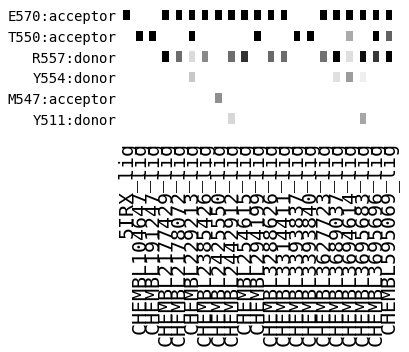

In [11]:
sc.ps.gel_plot_individual(cluster, 'hbond', l_list, interactions=interactions, resname_size = 14)
plt.xticks(range(0, 2*len(l_list), 2), l_list, rotation = 'vertical', size = 20)
plt.tight_layout()
plt.show()

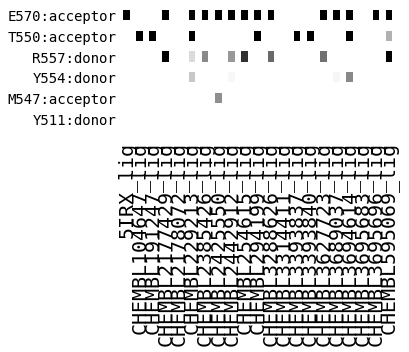

In [12]:
sc.ps.gel_plot_individual(glide_cluster, 'hbond', l_list, interactions=interactions, resname_size = 14)
plt.xticks(range(0, 2*len(l_list), 2), l_list, rotation = 'vertical', size = 20)
plt.tight_layout()
plt.show()

In [13]:
sc.ps.get_rmsd({'5IRX_lig': cluster['5IRX_lig']}), sc.ps.get_rmsd({'5IRX_lig': glide_cluster['5IRX_lig']})

(5.35689422109, 5.35689422109)